In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
%cd /content/drive/MyDrive/Grocery_Recommendation/Kaggle_data

/content/drive/MyDrive/Grocery_Recommendation/Kaggle_data


In [ ]:
pip install -U seaborn #updating the seaborn library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color.palette() #used to color the plot,, ignore as of now if not able to understand
%matplotlib inline
pd.options.mode.chained_assignment = None #defauly == warn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
##user function.py is present in flask_app file
#from user_functions import *
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting up default visualization parameters 
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
sns.set_context("notebook", rc={"font.size":16, "axes.titlesize":20, "axes.labelsize":18})
sns.set(font='Franklin Gothic Book',
rc={'axes.axisbelow': False,
'axes.edgecolor': 'lightgrey',
# 'axes.edgecolor': 'white',
'axes.facecolor': 'None',
'axes.grid': False,
'axes.labelcolor': 'dimgrey',
# 'axes.labelcolor': 'white',
'axes.spines.right': False,
'axes.spines.top': False,
'axes.prop_cycle': plt.cycler(color=color_list),
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
'text.color': 'dimgrey',
# 'text.color': 'white',    
'xtick.bottom': False,
'xtick.color': 'dimgrey',
# 'xtick.color': 'white',    
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'dimgrey',
# 'ytick.color': 'white',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})

In [ ]:
order_products_train_df = pd.read_csv("order_products__train.csv") #order_products_train
order_products_prior_df = pd.read_csv("order_products__prior.csv")  #order_products_prior
aisles_df = pd.read_csv("aisles.csv")   #aisles
departments_df = pd.read_csv("departments.csv")  #departments
products = pd.read_csv("products.csv")  #products
orders_df = pd.read_csv("orders.csv")  #orders


Data is very clean, Nan values are present in days since prior order but but these value are not NAN actually, these values represnt data


In [ ]:
order_products_train_df.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
order_products_prior_df.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
orders_df.isna().sum()
#nan values in days_since_prior_order is valid and apt

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
order_products_train_df.head()
#add_to_cart_order--> order in which order has been added to the cart


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
orders_df.head()
#for order number 1, day_since_prior_order will be NaN

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


User wise analysis


In [ ]:
orders_df[orders_df.user_id== 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
aisles_df.head()
#not able to understand this
#aisle is I think bucketing or grouping items depending on their types

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
#def unique_count(x):
#  return len(np.unique(x))

#count_acc = orders_df.groupby(["eval_set","user_id"].aggregate(unique_count())
#count_acc
#we've fragmented the dataset for our onw use

In [ ]:
print(len(products)) #how many different products are there 
print(products.aisle_id.nunique()) #how many unique aisle ids are there
print(products.department_id.nunique()) #how many unique department ids are there

49688
134
21


## EDA

In [ ]:
#merging to get an idea of what product comes under what aisle id and department id and further use it for building the model
product_aisles = pd.merge(products, aisles_df, on = "aisle_id" , how = "left")
product_desc = pd.merge(product_aisles , departments_df , on="department_id" , how = "left")
product_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


Text(0.5, 0, 'Department')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


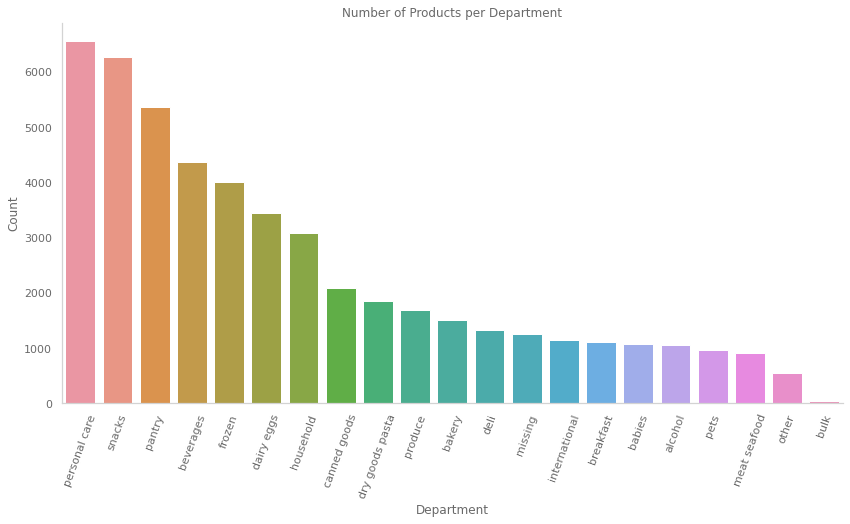

In [ ]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= product_desc, order = product_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')
#plt.savefig('products_by_department.png');

Text(0.5, 0, 'Aisle')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


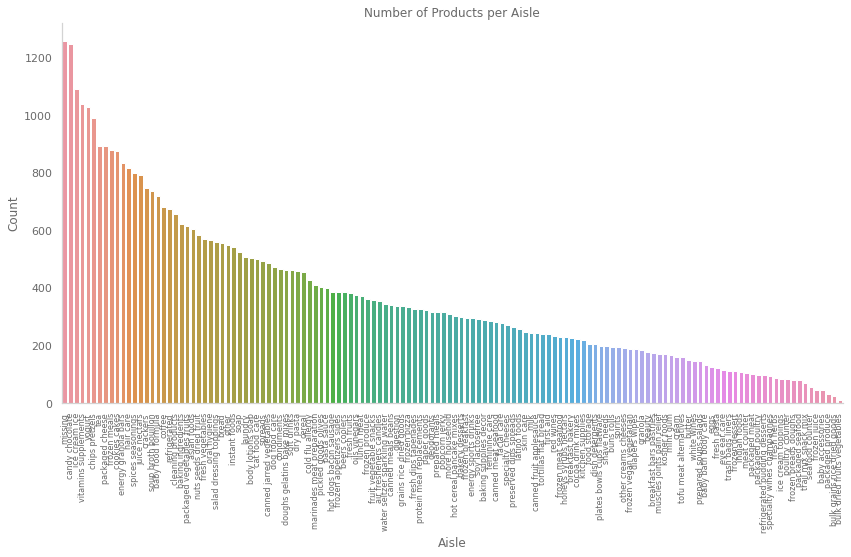

In [ ]:
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= product_desc, order = product_desc.aisle.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')
#plt.savefig('Images/products_by_aisle.png');

In [ ]:
product_desc[product_desc['aisle']=="missing"]
##here we can see aisle_id 100 and department_id 21 has missing aisle and deparment

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [ ]:
#pickle.dump(product_desc, open("Pickle/products_desc.p", "wb"))
#Utkarsh bhaiya ye save kaise krte h file colab ke through /\

In [ ]:
product_desc[product_desc['department']=='snacks']

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
15,16,Mint Chocolate Flavored Syrup,103,19,ice cream toppings,snacks
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,energy granola bars,snacks
31,32,Nacho Cheese White Bean Chips,107,19,chips pretzels,snacks
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers,snacks
...,...,...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19,chips pretzels,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks
49665,49666,Ginger Snaps Snacking Cookies,61,19,cookies cakes,snacks
49670,49671,Milk Chocolate Drops,45,19,candy chocolate,snacks


In [ ]:
product_desc[product_desc['department']=='snacks']
#one department can contain different aisles

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
15,16,Mint Chocolate Flavored Syrup,103,19,ice cream toppings,snacks
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,energy granola bars,snacks
31,32,Nacho Cheese White Bean Chips,107,19,chips pretzels,snacks
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers,snacks
...,...,...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19,chips pretzels,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks
49665,49666,Ginger Snaps Snacking Cookies,61,19,cookies cakes,snacks
49670,49671,Milk Chocolate Drops,45,19,candy chocolate,snacks


In [ ]:
product_desc[product_desc['aisle_id']==45]

,product_id,product_name,aisle_id,department_id,aisle,department
123,124,Sun Cups Dark Chocolate,45,19,candy chocolate,snacks
135,136,Simple,45,19,candy chocolate,snacks
183,184,Kisses Milk Chocolate Candy,45,19,candy chocolate,snacks
206,207,Minis Candy Bars,45,19,candy chocolate,snacks
226,227,Triple Chocolate Snack Size,45,19,candy chocolate,snacks
...,...,...,...,...,...,...
49503,49504,Dark Chocolate Peanut Butter Cups Miniatures,45,19,candy chocolate,snacks
49600,49601,Pomegranate Gummy Bears,45,19,candy chocolate,snacks
49619,49620,Milk Chocolate Mini's,45,19,candy chocolate,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks


In [ ]:
#pickle.dump(products_desc, open("Pickle/products_desc.p", "wb"))

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


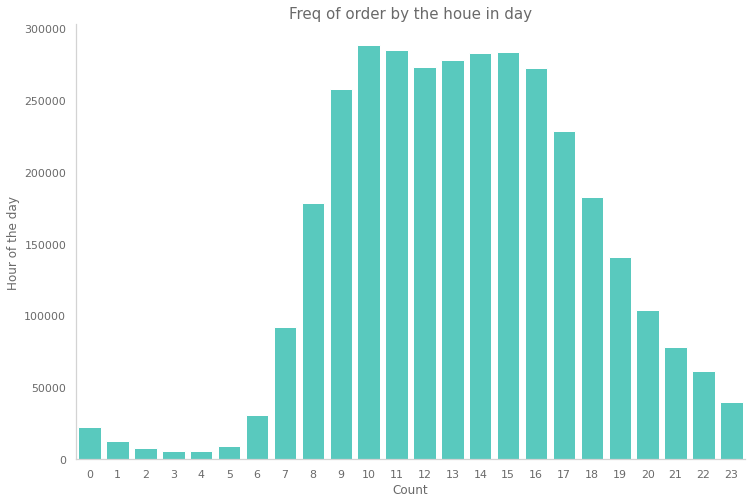

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color_list[2])
plt.xlabel("Count", fontsize=12)
plt.ylabel("Hour of the day", fontsize=12)
plt.title("Freq of order by the houe in day", fontsize=15)
plt.show()

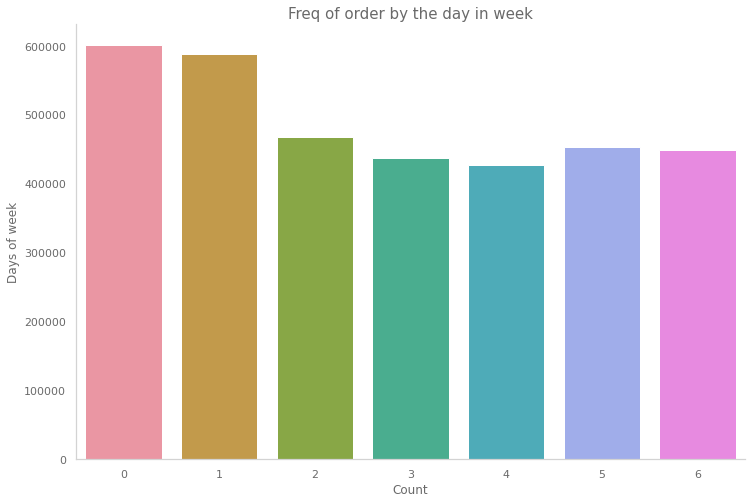

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Days of week", fontsize=12)
plt.title("Freq of order by the day in week", fontsize=15)
plt.show()

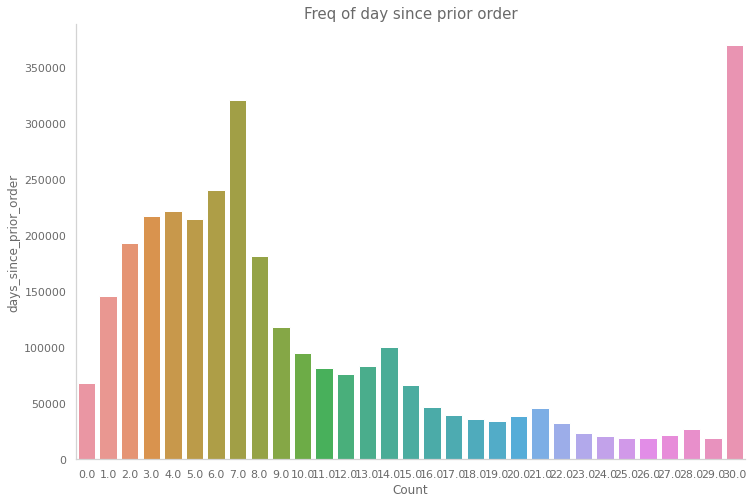

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df)
plt.xlabel("Count", fontsize=12)
plt.ylabel("days_since_prior_order", fontsize=12)
plt.title("Freq of day since prior order", fontsize=15)
plt.show()

In [ ]:
orders_df.sort_values('order_id')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


In [ ]:
orders_df[orders_df['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


## User wise analysis just for fun


In [ ]:
orders_df[orders_df.user_id== 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
#to know more about the order number 1187899 we can go to the train data set
order_products_train_df[order_products_train_df.order_id == 1187899]
#we got a list of products under this order in the train wala dataset, happy? ruko bhai

,order_id,product_id,add_to_cart_order,reordered
484420,1187899,196,1,1
484421,1187899,25133,2,1
484422,1187899,38928,3,1
484423,1187899,26405,4,1
484424,1187899,39657,5,1
484425,1187899,10258,6,1
484426,1187899,13032,7,1
484427,1187899,26088,8,1
484428,1187899,27845,9,0
484429,1187899,49235,10,1


In [ ]:
len(orders_df[orders_df.user_id ==1])
#we got to know that this person has ordered in total 11 times

11

In [ ]:
#to get more about this person we can perform more analysis
orders_df[orders_df.user_id == 1].order_dow.mode()
#this person orders once in 4 days 

0    4
dtype: int64

In [ ]:
orders_df[orders_df.user_id ==1].order_hour_of_day.mean()
#this user orders mostly early in the morning

10.090909090909092

In [ ]:
orders_df[orders_df.user_id == 1].days_since_prior_order.mean()
#he/she orders in 19 days 

19.0

In [ ]:
list(orders_df[orders_df.user_id ==1]['order_id'].values)
#we know this person ordered 11 orders till now, here are the order id of all the orders he had ordered

[2539329,
 2398795,
 473747,
 2254736,
 431534,
 3367565,
 550135,
 3108588,
 2295261,
 2550362,
 1187899]

In [ ]:
order_products_prior_df[order_products_prior_df['order_id'].isin(list(orders_df[orders_df.user_id ==1]['order_id'].values))].head()

,order_id,product_id,add_to_cart_order,reordered
4089398,431534,196,1,1
4089399,431534,12427,2,1
4089400,431534,10258,3,1
4089401,431534,25133,4,1
4089402,431534,10326,5,0


In [ ]:
order_products_train_df[order_products_train_df['order_id'].isin(list(orders_df[orders_df.user_id ==1]['order_id'].values))].head()

,order_id,product_id,add_to_cart_order,reordered
484420,1187899,196,1,1
484421,1187899,25133,2,1
484422,1187899,38928,3,1
484423,1187899,26405,4,1
484424,1187899,39657,5,1


In [ ]:
# As we can feel a need to merge orders and products together to get a better id

In [ ]:
merged_df = pd.merge(order_products_prior_df, order_products_train_df , how= 'outer')
merged_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Product Per order

In [ ]:
# now to get idea of products per order we need to use group by function
product_per_order_df = merged_df.groupby('order_id').count()
product_per_order_df.head()

,product_id,add_to_cart_order,reordered
order_id,,,
1,8,8,8
2,9,9,9
3,8,8,8
4,13,13,13
5,26,26,26


Text(0.5, 0, 'Products')

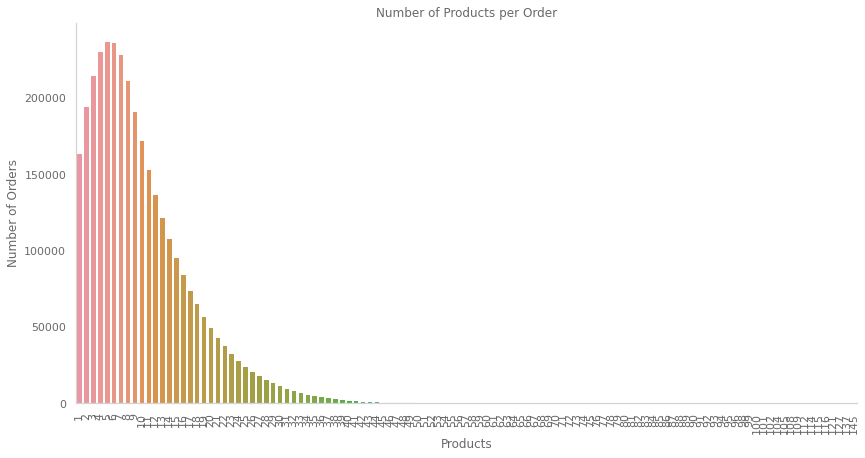

In [ ]:
plt.figure(figsize = (14,7))
sns.countplot(x='product_id', data = product_per_order_df)
plt.title('Number of Products per Order')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Products')
#plt.savefig('Images/product_count_by_order.png');

## Product Desc  

In [ ]:
order_desc_df = pd.merge(merged_df, product_desc, on = 'product_id')
order_desc_df.head()
#this dataframe contains all the description of all products 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


In [ ]:
order_desc_df['product_name'].value_counts()

Banana                                                        491291
Bag of Organic Bananas                                        394930
Organic Strawberries                                          275577
Organic Baby Spinach                                          251705
Organic Hass Avocado                                          220877
                                                               ...  
Yellow Fish Breading                                               1
Aged Parmesan Cheese Sticks                                        1
Drink Distinct All Natural Soda Pineapple Coconut & Nutmeg         1
Original Lager                                                     1
Water With Electrolytes                                            1
Name: product_name, Length: 49685, dtype: int64

## Data Visualisation

Text(0.5, 0, 'Product Name')

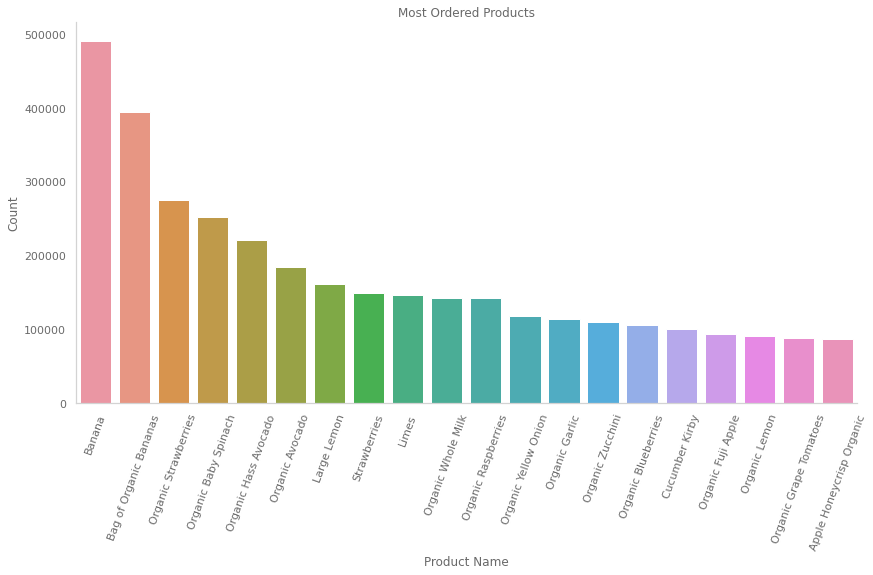

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='product_name', data= order_desc_df, order= order_desc_df.product_name.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Name')
#plt.savefig('Images/ordered_products_by_name.png');

Text(0.5, 0, 'Product Name')

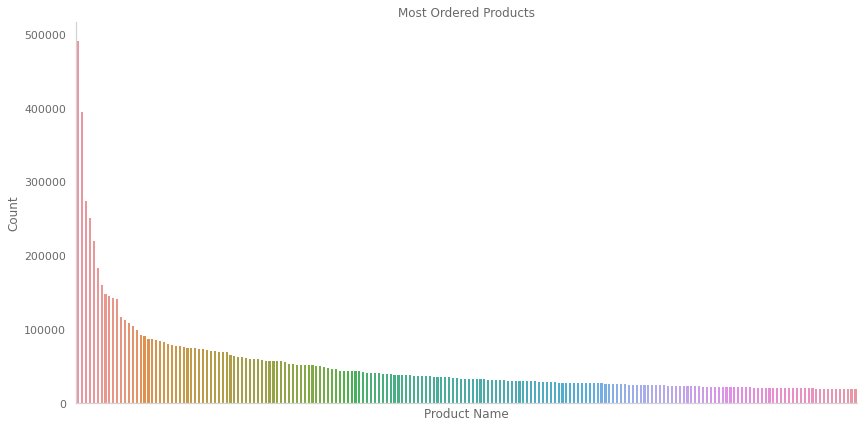

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='product_name', data= order_desc_df, order= order_desc_df.product_name.value_counts().index[:200])
plt.title('Most Ordered Products')
plt.xticks([])
plt.ylabel('Count')
plt.xlabel('Product Name')
#plt.savefig('Images/ordered_products_by_name.png');

Text(0.5, 0, 'Department')

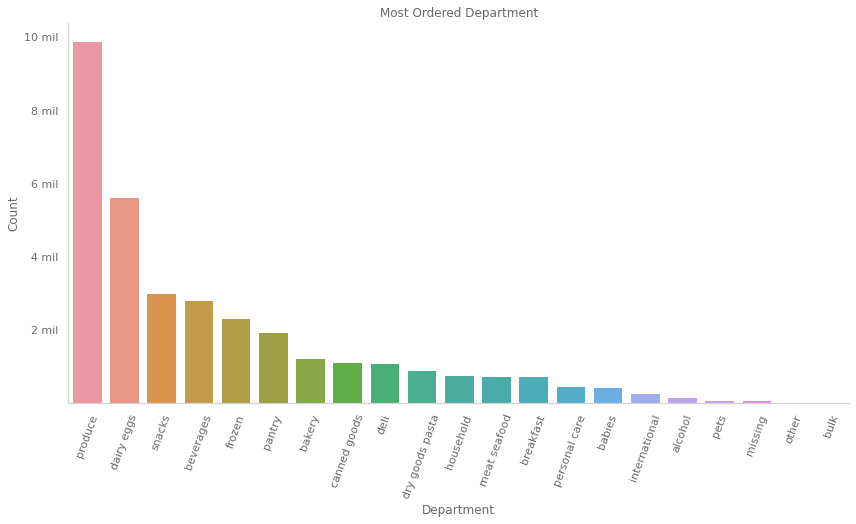

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='department', data= order_desc_df, order= order_desc_df.department.value_counts().index)
plt.title('Most Ordered Department')
plt.xticks(rotation=70)
plt.yticks([2000000,4000000,6000000,8000000,10000000],['2 mil','4 mil','6 mil','8 mil','10 mil'])
plt.ylabel('Count')
plt.xlabel('Department')
#plt.savefig('Images/ordered_products_by_name.png');

Text(0.5, 0, 'Aisle')

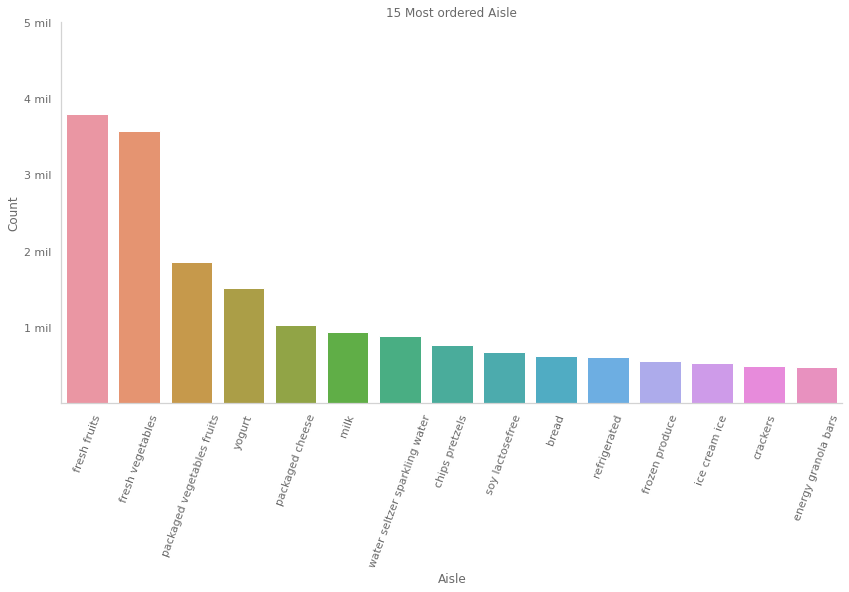

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='aisle', data= order_desc_df, order= order_desc_df.aisle.value_counts().index[:15])
plt.title('15 Most ordered Aisle')
plt.xticks(rotation=70)
plt.yticks([1000000,2000000,3000000,4000000,5000000],['1 mil','2 mil','3 mil','4 mil','5 mil'])
plt.ylabel('Count')
plt.xlabel('Aisle')
#plt.savefig('Images/ordered_products_by_name.png');
#Mostly people order Fresh Fruits

## Merge Order desc with User information

In [ ]:
import pandas as pd
from typing import List


def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            if not (type(df[col][0])==list):
                num_unique_values = len(df[col].unique())
                num_total_values = len(df[col])
                if float(num_unique_values) / num_total_values < 0.5:
                    df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df



def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))


In [ ]:
order_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
 7   aisle              object
 8   department         object
dtypes: int64(6), object(3)
memory usage: 2.5+ GB


In [ ]:
order_desc_df = optimize(order_desc_df, ['order_id','product_id','add_to_cart_order','reordered','aisle_id','department_id'])
order_desc_df.info()

In [ ]:
merged_final_df = pd.merge(orders_df, order_desc_df, on='order_id')
merged_final_df.head()
#BC Crash 

## Clustering

In [ ]:
count_orders = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count_orders = count_orders.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_orders.index, count_orders.values, alpha=0.8, color=color[1])
plt.ylabel("Number of occurances", fontsize=12)
plt.xlabel("Maximum Order Number", fontsize=12)
plt.xticks(rotation="vertical")
plt.show()

NameError: ignored

<Figure size 864x576 with 0 Axes>

Seems like users order mostly on first two days, but the difference is not that **large**

Users order mostly on weekly basis on monthly basis that's why the peak is coming in

In [ ]:
order_products__prior_df.head()

**Peak Hours are in afternoon** Reason could be sunny weather ?


In [ ]:
# Percentage of reorder in Prior dataset
order_products__prior_df.reordered.sum()/order_products__prior_df.shape[0]

In [ ]:
order_products__train_df.reordered.sum()/order_products__train_df.shape[0]

Approx 59% of the orderes have been reordered


In [ ]:
group_df = order_products__prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
group_df["reordered"].loc[group_df["reordered"]>1]=1
group_df.reordered.value_counts()/group_df.shape[0]

12 % of the orders doesn't contains any single reordered item
--> This is with reference to prior dataset
next we see same for train dataset

In [ ]:
group_df = order_products__train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
group_df["reordered"].loc[group_df["reordered"]>1]=1
group_df.reordered.value_counts()/group_df.shape[0]

In train dataset only 6% orderes doesn't contains any reordered item

In [ ]:
count_orders = order_products__train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count_orders = count_orders.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_orders.index, count_orders.values, alpha=0.8, color=color[1])
plt.ylabel("Number of occurances", fontsize=12)
plt.xlabel("Number of Products in given order", fontsize=12)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
count_orders = order_products__prior_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count_orders = count_orders.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_orders.index, count_orders.values, alpha=0.8, color=color[1])
plt.ylabel("Number of occurances", fontsize=12)
plt.xlabel("Number of Products in given order", fontsize=12)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
products.head()